In [231]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles

# Datos Códigos Departamentos

In [232]:
df_departamentos_codigos = pd.read_csv('../../Data/Departamentos_Codigos.csv')

In [233]:
df_departamentos_codigos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Codigo                               33 non-null     int64 
 1   Departamento_DANE                    33 non-null     object
 2   Departamento_DIVIPOLA                33 non-null     object
 3   Departamento_REPS                    33 non-null     object
 4   Departamento_IPS_Complejidad         33 non-null     object
 5   Departamento_IPS_Atencion_Capacidad  33 non-null     object
 6   Departamento_Capacidad_Instalada     33 non-null     object
 7   Departamento_Radiografia             33 non-null     object
 8   Departamento_Caracterizacion         33 non-null     object
 9   Departamento                         33 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.7+ KB


# Datos REPS

In [234]:
df_reps = pd.read_csv('../../Data/REPS.csv')

C:\Users\SGM\AppData\Local\Temp\ipykernel_7172\3122532733.py:1: DtypeWarning:

Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.



In [235]:
df_reps['codigo_prestador'] = df_reps['CodigoPrestador']
df_reps['codigo_habilitacion_sede'] = df_reps['CodigoHabilitacionSede']
df_reps.iloc[56503]['CodigoPrestador'], df_reps.iloc[56503]['CodigoHabilitacionSede'], df_reps.iloc[74472]['CodigoPrestador'], df_reps.iloc[74472]['CodigoHabilitacionSede']

df_reps.at[56503, 'codigo_prestador'] = df_reps.iloc[56503]['CodigoPrestador'].replace(" ", "")
df_reps.at[56503, 'codigo_habilitacion_sede'] = df_reps.iloc[56503]['CodigoHabilitacionSede'].replace(" ", "")
df_reps.at[74472, 'codigo_prestador'] = df_reps.iloc[74472]['CodigoPrestador'].replace(" ", "")
df_reps.at[74472, 'codigo_habilitacion_sede'] = df_reps.iloc[74472]['CodigoHabilitacionSede'].replace(" ", "")

df_reps['codigo_prestador'] = df_reps['codigo_prestador'].astype(np.int64)
df_reps['codigo_habilitacion_sede'] = df_reps['codigo_habilitacion_sede'].astype(np.int64)

In [236]:
columnas = [
    'DepartamentoSedeDesc',
    'MunicipioPrestadorDesc',
    'MunicipioSedeDesc',
    'codigo_prestador',
    'codigo_habilitacion_sede',
    'NaturalezaJuridica',
    'ClasePrestadorDesc'
]

In [237]:
df_reps = df_reps[columnas]

In [238]:
departamentos = [
    'Amazonas', 'Antioquia', 'Arauca', 'Atlántico',
    'Bogotá D.C', 'Bolívar', 'Boyacá', 'Caldas',
    'Caquetá', 'Casanare', 'Cauca', 'Cesar', 
    'Chocó', 'Córdoba', 'Cundinamarca', 'Guainía', 
    'Guaviare', 'Huila', 'La Guajira', 'Magdalena',
    'Meta', 'Nariño', 'Norte de Santander', 'Putumayo',
    'Quindío', 'Risaralda', 'San Andrés y Providencia', 'Santander',
    'Sucre', 'Tolima', 'Valle del cauca', 'Vaupés', 
    'Vichada'
    ]

distritos_especiales = [
    'Barranquilla',
    'Buenaventura',
    'Cartagena',
    'Santa Marta'
]

distritos_especiales_departamentos = {
    'Barranquilla': 'Atlántico',
    'Buenaventura': 'Valle del cauca',
    'Cartagena': 'Bolívar',
    'Santa Marta': 'Magdalena',
    'Cali': 'Valle del cauca'
}

In [239]:
df_reps['Departamento'] = df_reps['DepartamentoSedeDesc'].replace(distritos_especiales_departamentos)

In [240]:
df_reps = df_reps[df_reps['ClasePrestadorDesc'] == 'Instituciones Prestadoras de Servicios de Salud - IPS']

In [241]:
df_reps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19726 entries, 0 to 76393
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DepartamentoSedeDesc      19726 non-null  object
 1   MunicipioPrestadorDesc    19726 non-null  object
 2   MunicipioSedeDesc         19726 non-null  object
 3   codigo_prestador          19726 non-null  int64 
 4   codigo_habilitacion_sede  19726 non-null  int64 
 5   NaturalezaJuridica        19726 non-null  object
 6   ClasePrestadorDesc        19726 non-null  object
 7   Departamento              19726 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [242]:
df_reps.head()

,DepartamentoSedeDesc,MunicipioPrestadorDesc,MunicipioSedeDesc,codigo_prestador,codigo_habilitacion_sede,NaturalezaJuridica,ClasePrestadorDesc,Departamento
0,Amazonas,LETICIA,EL ENCANTO,9100100019,912630001911,Pública,Instituciones Prestadoras de Servicios de Salu...,Amazonas
1,Amazonas,LETICIA,LA CHORRERA,9100100019,914050001914,Pública,Instituciones Prestadoras de Servicios de Salu...,Amazonas
2,Amazonas,LETICIA,LA PEDRERA,9100100019,914070001915,Pública,Instituciones Prestadoras de Servicios de Salu...,Amazonas
3,Amazonas,LETICIA,LA VICTORIA,9100100019,914300001916,Pública,Instituciones Prestadoras de Servicios de Salu...,Amazonas
5,Amazonas,LETICIA,LETICIA,9100100019,910010001901,Pública,Instituciones Prestadoras de Servicios de Salu...,Amazonas


# IPS por Departamento - 2022

In [243]:
df_num_reps = df_reps.groupby('Departamento').agg(IPS_2022=('codigo_habilitacion_sede', 'count')).reset_index().sort_values('IPS_2022', ascending=True).reset_index(drop=True)
df_num_reps['porcentaje'] = (df_num_reps['IPS_2022'] / (df_num_reps['IPS_2022'].sum()) * 100).round(2)
df_num_reps

,Departamento,IPS_2022,porcentaje
0,Vichada,12,0.06
1,Guainía,12,0.06
2,San Andrés y Providencia,25,0.13
3,Amazonas,25,0.13
4,Guaviare,34,0.17
5,Vaupés,55,0.28
6,Caquetá,109,0.55
7,Putumayo,124,0.63
8,Arauca,142,0.72
9,Casanare,209,1.06


In [244]:
fig = px.bar(data_frame=df_num_reps, 
             x='IPS_2022', 
             y='Departamento', 
             orientation='h')

fig.update_xaxes(title_text='Número de IPS')
fig.update_xaxes(range=[0,3100])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Número de IPS por Departamento - 2022')

color_sequence = ['#3364C7' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_num_reps['IPS_2022'], textposition='outside')

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(width=800, height=700)

fig.show()

In [245]:
fig = px.bar(data_frame=df_num_reps,
             x='porcentaje',
             y='Departamento', 
             orientation='h')

fig.update_xaxes(title_text='Porcentaje IPS (%)')
fig.update_xaxes(range=[0, 16])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Porcentaje IPS por Departamento - 2022')

color_sequence = ['#3364C7' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_num_reps['porcentaje'], textposition='outside')

fig.update_layout(width=800, height=700)

fig.show()

# IPS por Departamento - 2013

In [246]:
df_radiografia = pd.read_csv("../../Data/Datos_Radiografia_Servicios_Salud.csv")

In [247]:
df_radiografia = df_radiografia.sort_values('Numero_IPS')
df_radiografia['porcentaje'] = (df_radiografia['Numero_IPS'] / (df_radiografia['Numero_IPS'].sum()) * 100).round(2)

In [248]:
df_radiografia

,Departamento,Numero_IPS,IPS/Habitantes,porcentaje
32,Vaupés,4,9,0.02
31,Guainía,8,20,0.04
30,San Andrés y Providencia,17,23,0.09
29,Amazonas,25,34,0.13
28,Guaviare,27,25,0.14
27,Vichada,33,48,0.17
26,Caquetá,108,23,0.57
25,Arauca,133,52,0.70
24,Putumayo,191,57,1.01
23,Casanare,210,61,1.11


In [249]:
fig = px.bar(data_frame=df_radiografia, x='Numero_IPS', y='Departamento', orientation='h')

fig.update_xaxes(title_text='Número de IPS')
fig.update_xaxes(range=[0,3500])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Número de IPS por Departamento - 2013')

color_sequence = ['#3364C7' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_radiografia['Numero_IPS'], textposition='outside')

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(width=800, height=700)

fig.show()

In [250]:
fig = px.bar(data_frame=df_radiografia,
             x='porcentaje',
             y='Departamento', 
             orientation='h')

fig.update_xaxes(title_text='Porcentaje IPS (%)')
fig.update_xaxes(range=[0, 19])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Porcentaje IPS por Departamento - 2013')

color_sequence = ['#3364C7' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_radiografia['porcentaje'], textposition='outside')

fig.update_layout(width=800, height=700)

fig.show()

# Cambios IPS - 2013-2022

In [251]:
df_comparison = pd.merge(df_num_reps, df_radiografia, how='inner', left_on='Departamento', right_on='Departamento')

In [252]:
df_comparison.head()

,Departamento,IPS_2022,porcentaje_x,Numero_IPS,IPS/Habitantes,porcentaje_y
0,Vichada,12,0.06,33,48,0.17
1,Guainía,12,0.06,8,20,0.04
2,San Andrés y Providencia,25,0.13,17,23,0.09
3,Amazonas,25,0.13,25,34,0.13
4,Guaviare,34,0.17,27,25,0.14


In [253]:
df_comparison['cambio'] = df_comparison['IPS_2022'] - df_comparison['Numero_IPS']
df_comparison['cambio_porcentual'] = ((df_comparison['IPS_2022'] - df_comparison['Numero_IPS']) / df_comparison['Numero_IPS'] * 1).round(2)
# df_comparison.sort_values('cambio', ascending=True, inplace=True)

In [254]:
df_comparison

,Departamento,IPS_2022,porcentaje_x,Numero_IPS,IPS/Habitantes,porcentaje_y,cambio,cambio_porcentual
0,Vichada,12,0.06,33,48,0.17,-21,-0.64
1,Guainía,12,0.06,8,20,0.04,4,0.50
2,San Andrés y Providencia,25,0.13,17,23,0.09,8,0.47
3,Amazonas,25,0.13,25,34,0.13,0,0.00
4,Guaviare,34,0.17,27,25,0.14,7,0.26
5,Vaupés,55,0.28,4,9,0.02,51,12.75
6,Caquetá,109,0.55,108,23,0.57,1,0.01
7,Putumayo,124,0.63,191,57,1.01,-67,-0.35
8,Arauca,142,0.72,133,52,0.70,9,0.07
9,Casanare,209,1.06,210,61,1.11,-1,-0.00


In [255]:
fig = px.bar(data_frame=df_comparison, x='cambio', y='Departamento', orientation='h')

fig.update_xaxes(title_text='Cambio en Número de IPS')
fig.update_xaxes(range=[-450,350])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Cambio en Número de IPS por Departamento - 2013-2022')

color_sequence = ['#5B9279' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_comparison['cambio'], textposition='outside')

fig.update_layout(width=800, height=700)

fig.show()

In [256]:
fig = px.bar(data_frame=df_comparison, x='cambio_porcentual', y='Departamento', orientation='h')

fig.update_xaxes(title_text='Número de IPS')
fig.update_xaxes(range=[-2,14])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Cambio Porcentual en número de IPS por Departamento - 2013-2022')

color_sequence = ['#5B9279' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_comparison['cambio_porcentual'], textposition='outside')

fig.update_layout(width=800, height=700)

fig.show()

# Distribucion Naturaleza Juridica IPS - 2022

In [257]:
df_num_reps_naturaleza_global = df_reps.groupby('NaturalezaJuridica').agg(IPS_2022=('codigo_habilitacion_sede', 'count'))
df_num_reps_naturaleza_global['Porcentaje'] = (df_num_reps_naturaleza_global['IPS_2022'] / df_num_reps_naturaleza_global['IPS_2022'].sum() * 100).round(2)
df_num_reps_naturaleza_global = df_num_reps_naturaleza_global.reset_index()
df_num_reps_naturaleza_global['Category'] = ''

df_num_reps_naturaleza_global

,NaturalezaJuridica,IPS_2022,Porcentaje,Category
0,Mixta,60,0.30,
1,Privada,16045,81.34,
2,Pública,3621,18.36,


In [258]:
color_palette = {
    'Privada': '#3364C7',
    'Pública': '#8CBCB9',
    'Mixta': '#826251'
}

fig = px.bar(df_num_reps_naturaleza_global, 
             x='Category',
             y='IPS_2022',
             color='NaturalezaJuridica',
             barmode='stack',
             width=500,
             height=500,
             color_discrete_map=color_palette,
             title='Número de IPS por Naturaleza Juridica - 2022',
             )

fig.update_yaxes(range=[0,20000])
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Número IPS')

fig.update_layout(legend_title_text='Legends', legend=dict(title=dict(text='Naturaleza Jurídica')))

# Show the plot
fig.show()

In [259]:
color_palette = {
    'Privada': '#3364C7',
    'Pública': '#8CBCB9',
    'Mixta': '#826251'
}

fig = px.bar(df_num_reps_naturaleza_global, 
             x='Category',
             y='Porcentaje',
             color='NaturalezaJuridica',
             barmode='stack',
             width=500,
             height=500,
             color_discrete_map=color_palette,
             title='Porcentaje de IPS por Naturaleza Juridica - 2022',
             )

fig.update_yaxes(range=[0,100])
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Porcentaje IPS')

fig.update_layout(legend_title_text='Legends', legend=dict(title=dict(text='Naturaleza Jurídica')))

# Show the plot
fig.show()

# Distribucion Naturaleza Juridica por Departamento IPS - 2022

In [260]:
df_num_reps_naturaleza = df_reps.groupby(['Departamento', 'NaturalezaJuridica']).agg(IPS_2022=('codigo_habilitacion_sede', 'count')).unstack().fillna(0).stack().reset_index()
df_num_reps_naturaleza

,Departamento,NaturalezaJuridica,IPS_2022
0,Amazonas,Mixta,0.0
1,Amazonas,Privada,13.0
2,Amazonas,Pública,12.0
3,Antioquia,Mixta,8.0
4,Antioquia,Privada,1861.0
...,...,...,...
94,Vaupés,Privada,1.0
95,Vaupés,Pública,54.0
96,Vichada,Mixta,0.0
97,Vichada,Privada,8.0


In [261]:
df_num_reps_naturaleza = df_reps.pivot_table(values='codigo_habilitacion_sede', index='Departamento', columns='NaturalezaJuridica', aggfunc='count').fillna(0).reset_index()

df_num_reps_porcentaje = df_num_reps_naturaleza[['Departamento']].copy()

df_num_reps_porcentaje['Mixta'] = (df_num_reps_naturaleza['Mixta'] / (df_num_reps_naturaleza['Mixta'] + df_num_reps_naturaleza['Privada'] + df_num_reps_naturaleza['Pública']) * 100).round(2)
df_num_reps_porcentaje['Privada'] = (df_num_reps_naturaleza['Privada'] / (df_num_reps_naturaleza['Mixta'] + df_num_reps_naturaleza['Privada'] + df_num_reps_naturaleza['Pública']) * 100).round(2)
df_num_reps_porcentaje['Pública'] = (df_num_reps_naturaleza['Pública'] / (df_num_reps_naturaleza['Mixta'] + df_num_reps_naturaleza['Privada'] + df_num_reps_naturaleza['Pública']) * 100).round(2)

df_num_reps_porcentaje = df_num_reps_porcentaje.set_index('Departamento').stack().reset_index()

df_num_reps_porcentaje.columns = ['Departamento', 'NaturalezaJuridica', 'IPS_2022']

df_num_reps_naturaleza = df_num_reps_naturaleza.set_index('Departamento').stack().reset_index()
df_num_reps_naturaleza.columns = ['Departamento', 'NaturalezaJuridica', 'IPS_2022']

In [262]:
df_num_reps_naturaleza

,Departamento,NaturalezaJuridica,IPS_2022
0,Amazonas,Mixta,0.0
1,Amazonas,Privada,13.0
2,Amazonas,Pública,12.0
3,Antioquia,Mixta,8.0
4,Antioquia,Privada,1861.0
...,...,...,...
94,Vaupés,Privada,1.0
95,Vaupés,Pública,54.0
96,Vichada,Mixta,0.0
97,Vichada,Privada,8.0


In [263]:
df_num_reps_porcentaje

,Departamento,NaturalezaJuridica,IPS_2022
0,Amazonas,Mixta,0.00
1,Amazonas,Privada,52.00
2,Amazonas,Pública,48.00
3,Antioquia,Mixta,0.37
4,Antioquia,Privada,86.76
...,...,...,...
94,Vaupés,Privada,1.82
95,Vaupés,Pública,98.18
96,Vichada,Mixta,0.00
97,Vichada,Privada,66.67


In [264]:
df_num_reps_naturaleza = pd.merge(df_num_reps[['Departamento']], df_num_reps_naturaleza, how='inner', on='Departamento')
df_num_reps_naturaleza

,Departamento,NaturalezaJuridica,IPS_2022
0,Vichada,Mixta,0.0
1,Vichada,Privada,8.0
2,Vichada,Pública,4.0
3,Guainía,Mixta,1.0
4,Guainía,Privada,6.0
...,...,...,...
94,Antioquia,Privada,1861.0
95,Antioquia,Pública,276.0
96,Bogotá D.C,Mixta,1.0
97,Bogotá D.C,Privada,2769.0


In [265]:
color_palette = {
    'Privada': '#3364C7',
    'Pública': '#8CBCB9',
    'Mixta': '#826251'
}

fig = px.bar(data_frame=df_num_reps_naturaleza, 
             x='IPS_2022', 
             y='Departamento', 
             color='NaturalezaJuridica', 
             orientation='h',
             color_discrete_map=color_palette)

fig.update_xaxes(title_text='Número de IPS')
fig.update_xaxes(range=[0,3100])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Número de IPS por Departamento por Naturaleza Juridica- 2022')



# color_sequence = ['#3364C7' for i in departamentos]
# fig.update_traces(marker=dict(color=color_sequence))

# fig.update_traces(text=df_num_reps['Y2022'], textposition='outside')

fig.update_layout(legend_title_text='Legends', legend=dict(title=dict(text='Naturaleza Jurídica')))

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(width=800, height=700)

fig.show()

In [266]:
df_num_reps_porcentaje = pd.merge(df_num_reps[['Departamento']], df_num_reps_porcentaje, how='inner', on='Departamento')
df_num_reps_porcentaje

,Departamento,NaturalezaJuridica,IPS_2022
0,Vichada,Mixta,0.00
1,Vichada,Privada,66.67
2,Vichada,Pública,33.33
3,Guainía,Mixta,8.33
4,Guainía,Privada,50.00
...,...,...,...
94,Antioquia,Privada,86.76
95,Antioquia,Pública,12.87
96,Bogotá D.C,Mixta,0.03
97,Bogotá D.C,Privada,95.75


In [267]:
color_palette = {
    'Privada': '#3364C7',
    'Pública': '#8CBCB9',
    'Mixta': '#826251'
}

fig = px.bar(data_frame=df_num_reps_porcentaje, 
             x='IPS_2022', 
             y='Departamento', 
             color='NaturalezaJuridica', 
             orientation='h',
             color_discrete_map=color_palette)

fig.update_xaxes(range=[0,100])
fig.update_xaxes(title_text='Porcentaje Naturaleza Juridica (%)')
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Distribucion Naturaleza Juridica IPS por Departamento - 2022')

# color_sequence = ['#3364C7' for i in departamentos]
# fig.update_traces(marker=dict(color=color_sequence))

# fig.update_traces(text=df_num_reps['Y2022'], textposition='outside')

fig.update_layout(legend_title_text='Legends', legend=dict(title=dict(text='Naturaleza Jurídica')))

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(width=800, height=700)

fig.show()

# Poblacion - 2022

In [268]:
df_poblacion_2022 = pd.read_csv('../../Data/Poblacion_Departamento_2020_2050.csv')

In [269]:
df_poblacion_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DP               2079 non-null   int64 
 1   DPNOM            2079 non-null   object
 2   AÑO              2079 non-null   int64 
 3   ÁREA GEOGRÁFICA  2079 non-null   object
 4   Población        2079 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 81.3+ KB


In [270]:
df_poblacion_2022.head()

,DP,DPNOM,AÑO,ÁREA GEOGRÁFICA,Población
0,5,Antioquia,2020,Cabecera,5250157
1,5,Antioquia,2020,Centros Poblados y Rural Disperso,1399244
2,5,Antioquia,2020,Total,6649401
3,5,Antioquia,2021,Cabecera,5350556
4,5,Antioquia,2021,Centros Poblados y Rural Disperso,1375663


In [271]:
df_poblacion_2022 = df_poblacion_2022[(df_poblacion_2022['AÑO'] == 2022) & (df_poblacion_2022['ÁREA GEOGRÁFICA'] == 'Total')].reset_index(drop=True).drop(['AÑO', 'ÁREA GEOGRÁFICA'], axis=1).sort_values('Población').reset_index(drop=True)
df_poblacion_2022['Población_M'] = (df_poblacion_2022['Población'] / 1e6).round(2)
df_poblacion_2022 = pd.merge(df_poblacion_2022, df_departamentos_codigos[['Codigo', 'Departamento_DANE', 'Departamento']], how='inner', left_on='DPNOM', right_on='Departamento_DANE')
df_poblacion_2022

,DP,DPNOM,Población,Población_M,Codigo,Departamento_DANE,Departamento
0,97,Vaupés,45579,0.05,97,Vaupés,Vaupés
1,94,Guainía,55091,0.06,94,Guainía,Guainía
2,88,Archipiélago de San Andrés,62255,0.06,88,Archipiélago de San Andrés,San Andrés y Providencia
3,91,Amazonas,83690,0.08,91,Amazonas,Amazonas
4,95,Guaviare,94625,0.09,95,Guaviare,Guaviare
5,99,Vichada,120942,0.12,99,Vichada,Vichada
6,81,Arauca,307628,0.31,81,Arauca,Arauca
7,86,Putumayo,377095,0.38,86,Putumayo,Putumayo
8,18,Caquetá,421797,0.42,18,Caquetá,Caquetá
9,85,Casanare,459973,0.46,85,Casanare,Casanare


In [272]:
fig = px.bar(data_frame=df_poblacion_2022, 
             x='Población_M', 
             y='Departamento', 
             orientation='h')

fig.update_xaxes(range=[0,9])
fig.update_xaxes(title_text='Habitantes (Millones)')
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Habitantes por Departamento - 2022')

color_sequence = ['#3364C7' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_poblacion_2022['Población_M'], textposition='outside')

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(width=800, height=700)

fig.show()

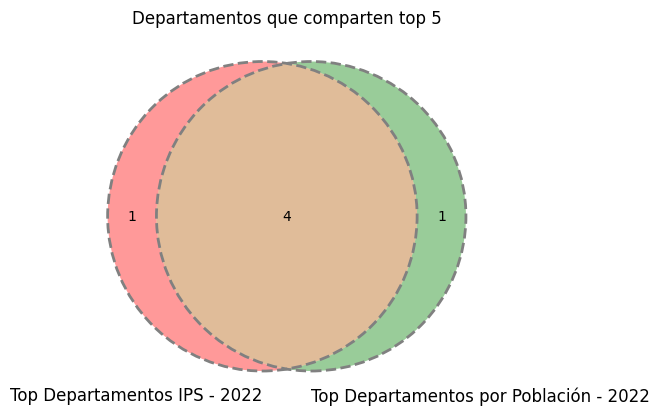

In [273]:
first_n_items = 5

departamentos_top_ips_2013 = list(df_radiografia['Departamento'])[-first_n_items:]
departamentos_top_ips = list(df_num_reps['Departamento'])[-first_n_items:]
departamentos_top_poblacion = list(df_poblacion_2022['Departamento'])[-first_n_items:]

set1 = set(departamentos_top_ips)
set2 = set(departamentos_top_ips_2013)
set3 = set(departamentos_top_poblacion)

# Calculate the intersection
# intersection = set1.intersection(set2)

# Create a Venn diagram
venn2([set1, set3], ('Top Departamentos IPS - 2022', 'Top Departamentos por Población - 2022'))

venn2_circles([set1, set3], linestyle='dashed', linewidth=2, color='grey')

# Add a label for the intersection (common items)
# plt.annotate(intersection, xy=(0.3, 0.35), fontsize=12, color='red')

plt.title(f'Departamentos que comparten top {first_n_items}')

# Display the plot
plt.show()

# IPS por Habitantes - 2022

In [274]:
df_num_reps['IPS_2022'].sum(), df_poblacion_2022['Población'].sum(), df_num_reps['IPS_2022'].sum() / df_poblacion_2022['Población'].sum() * 1e5

(19726, 51682692, 38.16751650629963)

In [275]:
df_ips_por_habitantes = pd.merge(df_num_reps, df_poblacion_2022, how='inner', on='Departamento')
df_ips_por_habitantes['IPS/Habitantes'] = (df_ips_por_habitantes['IPS_2022'] / df_ips_por_habitantes['Población'] * 1e5).round(0)
df_ips_por_habitantes = df_ips_por_habitantes.sort_values('IPS/Habitantes', ascending=True).reset_index(drop=True)
df_ips_por_habitantes

,Departamento,IPS_2022,porcentaje,DP,DPNOM,Población,Población_M,Codigo,Departamento_DANE,IPS/Habitantes
0,Vichada,12,0.06,99,Vichada,120942,0.12,99,Vichada,10.0
1,Guainía,12,0.06,94,Guainía,55091,0.06,94,Guainía,22.0
2,Cundinamarca,818,4.15,25,Cundinamarca,3334637,3.33,25,Cundinamarca,25.0
3,Caquetá,109,0.55,18,Caquetá,421797,0.42,18,Caquetá,26.0
4,Amazonas,25,0.13,91,Amazonas,83690,0.08,91,Amazonas,30.0
5,Norte de Santander,518,2.63,54,Norte de Santander,1678975,1.68,54,Norte de Santander,31.0
6,Cauca,480,2.43,19,Cauca,1541265,1.54,19,Cauca,31.0
7,Antioquia,2145,10.87,5,Antioquia,6787846,6.79,5,Antioquia,32.0
8,Huila,373,1.89,41,Huila,1164463,1.16,41,Huila,32.0
9,Putumayo,124,0.63,86,Putumayo,377095,0.38,86,Putumayo,33.0


In [276]:
fig = px.bar(data_frame=df_ips_por_habitantes, 
             x='IPS/Habitantes', 
             y='Departamento', 
             orientation='h')

# fig.update_xaxes(range=[0,9])
fig.update_xaxes(title_text='IPS por cada 100 mil habitantes')
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Número de IPS por cada 100 mil habitantes por Departamento - 2022')

color_sequence = ['#3364C7' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_ips_por_habitantes['IPS/Habitantes'], textposition='outside')

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.update_layout(width=800, height=700)

fig.show()

# Cambios IPS/Habitantes - 2013-2022

In [285]:
df_comparison = pd.merge(df_ips_por_habitantes, df_radiografia, how='inner', left_on='Departamento', right_on='Departamento', suffixes=['_2022', '_2013'])

In [286]:
df_comparison.head()

,Departamento,IPS_2022,porcentaje_2022,DP,DPNOM,Población,Población_M,Codigo,Departamento_DANE,IPS/Habitantes_2022,Numero_IPS,IPS/Habitantes_2013,porcentaje_2013
0,Vichada,12,0.06,99,Vichada,120942,0.12,99,Vichada,10.0,33,48,0.17
1,Guainía,12,0.06,94,Guainía,55091,0.06,94,Guainía,22.0,8,20,0.04
2,Cundinamarca,818,4.15,25,Cundinamarca,3334637,3.33,25,Cundinamarca,25.0,725,28,3.82
3,Caquetá,109,0.55,18,Caquetá,421797,0.42,18,Caquetá,26.0,108,23,0.57
4,Amazonas,25,0.13,91,Amazonas,83690,0.08,91,Amazonas,30.0,25,34,0.13


In [287]:
df_comparison['cambio'] = df_comparison['IPS/Habitantes_2022'] - df_comparison['IPS/Habitantes_2013']
df_comparison['cambio_porcentual'] = ((df_comparison['IPS/Habitantes_2022'] - df_comparison['IPS/Habitantes_2013']) / df_comparison['IPS/Habitantes_2013'] * 1).round(2)
# df_comparison.sort_values('cambio', ascending=True, inplace=True)

In [288]:
df_comparison

,Departamento,IPS_2022,porcentaje_2022,DP,DPNOM,Población,Población_M,Codigo,Departamento_DANE,IPS/Habitantes_2022,Numero_IPS,IPS/Habitantes_2013,porcentaje_2013,cambio,cambio_porcentual
0,Vichada,12,0.06,99,Vichada,120942,0.12,99,Vichada,10.0,33,48,0.17,-38.0,-0.79
1,Guainía,12,0.06,94,Guainía,55091,0.06,94,Guainía,22.0,8,20,0.04,2.0,0.10
2,Cundinamarca,818,4.15,25,Cundinamarca,3334637,3.33,25,Cundinamarca,25.0,725,28,3.82,-3.0,-0.11
3,Caquetá,109,0.55,18,Caquetá,421797,0.42,18,Caquetá,26.0,108,23,0.57,3.0,0.13
4,Amazonas,25,0.13,91,Amazonas,83690,0.08,91,Amazonas,30.0,25,34,0.13,-4.0,-0.12
5,Norte de Santander,518,2.63,54,Norte de Santander,1678975,1.68,54,Norte de Santander,31.0,517,39,2.73,-8.0,-0.21
6,Cauca,480,2.43,19,Cauca,1541265,1.54,19,Cauca,31.0,430,32,2.27,-1.0,-0.03
7,Antioquia,2145,10.87,5,Antioquia,6787846,6.79,5,Antioquia,32.0,1945,31,10.26,1.0,0.03
8,Huila,373,1.89,41,Huila,1164463,1.16,41,Huila,32.0,369,33,1.95,-1.0,-0.03
9,Putumayo,124,0.63,86,Putumayo,377095,0.38,86,Putumayo,33.0,191,57,1.01,-24.0,-0.42


In [306]:
fig = px.bar(data_frame=df_comparison, x='cambio', y='Departamento', orientation='h')

fig.update_xaxes(title_text='Cambio en Número de IPS')
fig.update_xaxes(range=[-47,122])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Cambio en Número de IPS por Departamento - 2013-2022')

color_sequence = ['#5B9279' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_comparison['cambio'], textposition='outside')

fig.update_layout(width=800, height=700)

fig.show()

In [296]:
fig = px.bar(data_frame=df_comparison, x='cambio_porcentual', y='Departamento', orientation='h')

fig.update_xaxes(title_text='Número de IPS')
fig.update_xaxes(range=[-2,14])
fig.update_yaxes(title_text='Departamento')
fig.update_layout(title='Cambio Porcentual en número de IPS por Departamento - 2013-2022')

color_sequence = ['#5B9279' for i in departamentos]
fig.update_traces(marker=dict(color=color_sequence))

fig.update_traces(text=df_comparison['cambio_porcentual'], textposition='outside')

fig.update_layout(width=800, height=700)

fig.show()